In [2]:
import numpy as np
from matplotlib import pyplot as plt
from gwaxion import physics

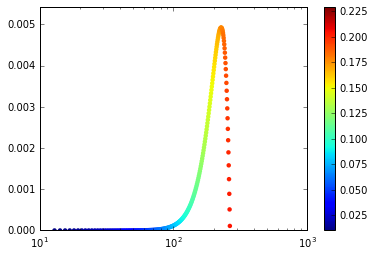

In [57]:
mbh_msun = 50
chi = 0.7
alphas = np.arange(0.01, 0.23, 0.001)
h0rs = []
fgws = []
for alpha in alphas:
    cloud = physics.BosonCloud.from_parameters(1, 1, 0,  m_bh=mbh_msun, chi_bh=chi, alpha=alpha)
    h0rs.append(cloud.gw.h0r)
    fgws.append(cloud.fgw)

s = plt.scatter(fgws, np.array(h0rs), c=alphas, edgecolor='none')
plt.colorbar(s)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0, max(h0rs)*1.1)
plt.show()